<a href="https://colab.research.google.com/github/hwnjoroge/Projects/blob/main/Imbalanced_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

Beta Bank customers are leaving. The bankers
figured out it’s cheaper to save the existing customers rather than to attract new ones.


Task: Predict whether a customer will leave the bank soon using a model with the maximum possible F1 score. 
Required: an F1 score of at least 0.59 on the test dataset


# Downloading the Data





Importing required libraries

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [3]:
#loading the dataset
credit_df = pd.read_csv('https://bit.ly/2XZK7Bo')


In [4]:
#viewing the dataset
credit_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB



The dataset contains 10000 rows and 14 columns.  

one of the columns 'Tenure' contains missing values.

two of the columns 'Surname' and 'Gender' have string values while the rest of the columns are of type integer/float.



In [6]:
credit_df.duplicated(['CustomerId']).value_counts()

False    10000
dtype: int64


 Each row of the dataset contains information about one customer. 

In [7]:
#examining the balance of the classes using the 'Exited' column
class_0 = credit_df[credit_df['Exited'] == 0]
class_1 = credit_df[credit_df['Exited'] == 1]

#print the shapes of the classes
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)


class 0: (7963, 14)
class 1: (2037, 14)


In [8]:
#dropping the blank rows in the column'Tenure'

credit_df.dropna(subset = ["Tenure"], inplace=True)
credit_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


In [9]:
#dropping the columns that will not be useful in our model ie -RowNumber,Surname and CustomerId
credit_df = credit_df.drop(labels=['RowNumber', 'Surname', 'CustomerId'], axis=1)
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


# Data Preparation 




### Encoding Categorical Features

 Encoding Categorical features 'Gender' and 'Geography'  will help us transform their categorical values in the dataset into numerical values.

In [39]:
#Gender column
#Encoding Male value to numeric value 1, and Female values to numeric value 0
#credit_df["Gender"] = np.where(credit_df["Gender"].str.contains("Male", "Female"), 1, 0)
#checking the encoding of the Gender column
credit_df.head()

AttributeError: ignored

In [40]:
#verifying the encoded values in the dataset
credit_df['Gender'].value_counts()

1    4974
0    4117
Name: Gender, dtype: int64

In [41]:
credit_df['Geography'].value_counts()

0    4550
1    2293
2    2248
Name: Geography, dtype: int64

In [42]:
#Label Encoding the Geography column
# convert the Geography column to a category, then use those category values for the label encoding:
credit_df["Geography"] = credit_df["Geography"].astype('category')
credit_df.dtypes

CreditScore           int64
Geography          category
Gender                int64
Age                   int64
Tenure              float64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

In [43]:
credit_df["Geography"] = credit_df["Geography"].cat.codes


In [44]:
#verifying the encoded values in the dataset
credit_df['Geography'].value_counts()

0    4550
1    2293
2    2248
Name: Geography, dtype: int64

In [45]:
#category_encoded = credit_df['Gender']+credit_df['Geography']

# Data Modelling on the imbalanced dataset 




###Training, Validation and Test Sets

Splitting the Dataset 

We split our dataset into training and test sets. 80% of the data for the training set and 20% for the test set. 

We also set the random_state to 12345 to endure reproducibility in the notebook.

In [46]:
# split the credit_df into train and test sets
#train_df, test_df = train_test_split(credit_df, test_size=0.2, random_state =12345)
train_val_df, test_df = train_test_split(credit_df, test_size=0.2, random_state=12345)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=12345)
print(train_df.shape, val_df.shape, test_df.shape)

(5454, 11) (1818, 11) (1819, 11)


### Identifying Input and Target Columns

In this dataset, the target column 'Exited' was identified and omitted from the training data and the input columns 

In [47]:
input_columns = list(train_df.columns)[:-1]
target_column = 'Exited'

In [48]:
input_columns

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [49]:
target_column

'Exited'

In [50]:
train_inputs = train_df[input_columns].copy()
train_targets = train_df[target_column].copy()
valid_inputs = val_df[input_columns].copy()
valid_targets = val_df[target_column].copy()
test_inputs = test_df[input_columns].copy()
test_targets = test_df[target_column].copy()

In [51]:
#view the training dataset
train_inputs.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3706,629,2,0,44,6.0,125512.98,2,0,0,79082.76
6805,614,0,0,35,1.0,0.00,2,1,1,3342.62
4449,666,0,1,36,3.0,0.00,2,1,0,35156.54


In [52]:
#view the validation dataset
valid_inputs.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4799,551,0,1,52,1.0,0.00,1,0,0,63584.55
396,557,0,1,33,3.0,54503.55,1,1,1,371.05
5144,485,0,0,25,3.0,134467.26,1,1,1,113266.09


In [53]:
#view the training target
train_targets

3706    0
6805    0
4449    0
598     1
1845    1
       ..
8706    1
113     0
4961    0
2403    0
208     1
Name: Exited, Length: 5454, dtype: int64

In [54]:
test_inputs.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
862,725,0,1,41,7.0,113980.21,1,1,1,116704.25
9727,530,0,0,45,1.0,0.00,1,0,1,190663.89
1717,707,2,0,35,3.0,56674.48,1,1,0,17987.40


In [55]:
test_targets.head

<bound method NDFrame.head of 862     0
9727    1
1717    1
8640    0
5288    0
       ..
7697    0
8323    0
3900    0
5474    0
1419    0
Name: Exited, Length: 1819, dtype: int64>

### Scaling Numeric Features

Scaling numeric features to ensure that no particular feature has a disproportionate impact on the model. 
The numeric columns in our dataset have varying ranges and will scaled to a small range of values between $(0,1)$ 


In [56]:
#selecting just the number columns from dataset and assigning them to the variable numeric cols
numeric_columns = credit_df.select_dtypes(include=np.number).columns.tolist()
print(numeric_columns)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [57]:
#dropping the encoded categorical columns and target columns and assigning to variable numerical columns
numerical_columns = credit_df.drop(['Geography','Gender', 'Exited'], axis=1).columns.tolist()
print(numerical_columns)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


Scaling using the `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [58]:
#fit the scaler to the numeric columns 
scaler = MinMaxScaler()
scaler.fit(credit_df[numerical_columns])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [59]:
credit_df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2,0,43,2.0,125510.82,1,1,1,79084.10,0


In [60]:
#scaling the train,validation and test datasets using the .tranform method
train_inputs[numerical_columns] = scaler.transform(train_inputs[numerical_columns])
valid_inputs[numerical_columns] = scaler.transform(valid_inputs[numerical_columns])
test_inputs[numerical_columns] = scaler.transform(test_inputs[numerical_columns])

In [61]:
#verifying the scaled values in the train dataset
train_inputs.describe().loc[['min', 'max']]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
min,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
max,1.0,2.0,1.0,1.0,1.0,0.885888,1.0,1.0,1.0,0.999804


In [62]:
#verifying the scaled values in the validation dataset
valid_inputs.describe().loc[['min', 'max']]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
min,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.001124
max,1.0,2.0,1.0,0.945946,1.0,1.0,1.0,1.0,1.0,1.000000


In [63]:
#verifying the scaled values in the test dataset
test_inputs.describe().loc[['min', 'max']]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
min,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.002029
max,1.0,2.0,1.0,0.878378,1.0,0.882959,1.0,1.0,1.0,0.999891


# Random Forest Model
Training the RandomForest Model  to predict the 'Exited' values.

To train a Random Forest model, we use the RandomForestClassifier class from Scikit-learn.

In [64]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   int8   
 2   Gender           9091 non-null   int64  
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(7), int8(1)
memory usage: 790.1 KB


In [65]:
random_model = RandomForestClassifier(n_jobs=-1, random_state=12345)

In [66]:
random_model.fit(train_inputs, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

### Evaluating the Random Forest 

Evaluating the accuracy of the Random Forest using model.score

In [67]:
random_model.score(train_inputs, train_targets)

1.0

In [68]:
random_model.score(valid_inputs, valid_targets)

0.8531353135313532

In [69]:
random_model.score(test_inputs, test_targets)

0.8515667949422759

The training set accuracy is 100%,  the accuracy on the validation set is  85.5% while the accuracy on the test set is 85%



0    1622
1     197
dtype: int64


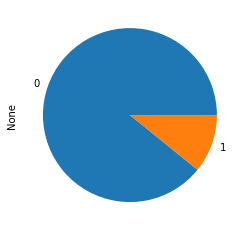

In [70]:
#Visualizing the count of predictions by the model.
test_preds = random_model.predict(test_inputs)
class_frequency = pd.value_counts(test_preds)
print(class_frequency)
class_frequency.plot(kind ='pie')


The model predicts 0 in the exit 88% of the times, and 12% of the time the model predicted a customer exit. 


#Dealing with Imbalanced Classes

Upsampling

In [71]:
credit_df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2,0,43,2.0,125510.82,1,1,1,79084.10,0


In [72]:
# Separate majority and minority classes
df_majority = credit_df[credit_df.Exited ==0 ]
df_minority = credit_df[credit_df.Exited ==1 ]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=7963,    # to match majority class
                                 random_state=12345) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Exited.value_counts()


1    7963
0    7237
Name: Exited, dtype: int64

In [73]:
df_upsampled.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,2,0,41,1.0,83807.86,1,0,1,112542.58,0
3,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2,0,43,2.0,125510.82,1,1,1,79084.10,0
6,822,0,1,50,7.0,0.00,2,1,1,10062.80,0
8,501,0,1,44,4.0,142051.07,2,0,1,74940.50,0


In [74]:
# split the upsampled dataset into train and test sets
newtrain_val_df, newtest_df = train_test_split(df_upsampled, test_size=0.2, random_state=12345)
newtrain_df, newval_df = train_test_split(newtrain_val_df, test_size=0.25, random_state=12345)
print(newtrain_df.shape, newval_df.shape, newtest_df.shape)

(9120, 11) (3040, 11) (3040, 11)


In [75]:
#identifying input and target columns
newinput_columns = list(newtrain_df.columns)[:-1]
newtarget_column = 'Exited'
print(newinput_columns)
print(newtarget_column)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Exited


In [77]:
#scaling the numerical features in df_upsampled
#selecting just the number columns from dataset and assigning them to the variable numeric cols
newnumeric_columns = df_upsampled.select_dtypes(include=np.number).columns.tolist()
print(newnumeric_columns)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [86]:
#dropping the encoded categorical columns and target columns and assigning to variable numerical columns
newnumerical_columns = df_upsampled.drop(['Geography','Gender', 'Exited'], axis=1).columns.tolist()
print(newnumerical_columns)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [87]:
#fit the scaler to the numeric columns 
scaler = MinMaxScaler()
scaler.fit(df_upsampled[newnumerical_columns])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [93]:
#scaling the train,validation and test datasets using the .tranform method
train_inputs[newnumerical_columns] = scaler.transform(train_inputs[newnumerical_columns])
valid_inputs[newnumerical_columns] = scaler.transform(valid_inputs[newnumerical_columns])
test_inputs[newnumerical_columns] = scaler.transform(test_inputs[newnumerical_columns])

In [94]:
#verifying the scaled values in the train dataset
train_inputs.describe().loc[['min', 'max']]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
min,-0.701403,0.0,0.0,-0.246575,0.000,0.000000e+00,-0.481481,0.0,0.0,-0.000058
max,-0.701403,2.0,1.0,-0.246572,0.001,5.609018e-17,-0.444444,1.0,1.0,-0.000058


In [90]:
#verifying the scaled values in the validation dataset
valid_inputs.describe().loc[['min', 'max']]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
min,-0.701400,0.0,0.0,-0.246530,0.00,0.000000e+00,-0.444444,0.0,0.0,-0.000058
max,-0.701396,2.0,1.0,-0.246358,0.01,1.588566e-11,-0.333333,1.0,1.0,-0.000058


In [91]:
#verifying the scaled values in the test dataset
test_inputs.describe().loc[['min', 'max']]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
min,-0.701400,0.0,0.0,-0.24653,0.00,0.000000e+00,-0.444444,0.0,0.0,-0.000058
max,-0.701396,2.0,1.0,-0.24637,0.01,1.402639e-11,-0.333333,1.0,1.0,-0.000058


###  Random Forest Model

Training and modelling using the Random Forest model on the upsampled dataset

In [96]:
upsampled_random_model = RandomForestClassifier(n_jobs=-1, random_state=12345)

In [97]:
upsampled_random_model.fit(train_inputs, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [98]:
upsampled_random_model.score(train_inputs, train_targets)

0.8832049871653832

In [99]:
upsampled_random_model.score(valid_inputs, valid_targets)

0.8294829482948295

In [100]:
upsampled_random_model.score(test_inputs, test_targets)

0.8350742166025289

The training set accuracy is 88%,  the accuracy on the validation set is  82.9% while the accuracy on the test set is 83.5%



In [101]:
test_preds = upsampled_random_model.predict(test_inputs)

In [104]:
  # calculate the F-Score
  print( 'F1:', f1_score(test_targets, test_preds))

F1: 0.4140625


### Logistic Regression model

Training and modelling using the logistic regression model on the upsampled dataset

In [113]:
df_upsampled.head()
df_upsampled.shape

(15200, 11)

In [108]:
#Training a logistic regression model with the upsampled data
# Separate input features (X) and target variable (y)
y = df_upsampled.Exited
X = df_upsampled.drop('Exited', axis=1)
 
# Training the model
log_model = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = log_model.predict(X)

In [109]:
# Checking if the model is predicting both classes
print( np.unique( pred_y_1 ) )

[0 1]


In [110]:
# Checking the accuracy of the logistic regression model
print( accuracy_score(y, pred_y_1) )

0.6603947368421053


In [117]:
pred_y_1 = df_upsampled[['Exited']]
pred_y_1.shape
#test_preds = log_model.predict(pred_y_1)

(15200, 1)

In [131]:
  # calculating the F-Score
 # print( 'F1:', f1_score(X, test_preds))

#Dealing with Imbalanced Classes

Downsampling

In [118]:
credit_df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2,0,43,2.0,125510.82,1,1,1,79084.10,0


In [120]:
#display the imbalanced class counts
credit_df.Exited.value_counts()

0    7237
1    1854
Name: Exited, dtype: int64

In [121]:
# Separate majority and minority classes
df_majority = credit_df[credit_df.Exited==0]
df_minority = credit_df[credit_df.Exited==1]
 
# Downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1854,     # to match minority class
                                 random_state=12345) # reproducible results
 


In [123]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Exited.value_counts()


1    1854
0    1854
Name: Exited, dtype: int64

the new downsampled dataframe has fewer observations than the original, and the ratio of the two classes is now 1:1.

In [125]:
#Train model on downsampled datasetPython
# Separate input features (X) and target variable (y)
y = df_downsampled.Exited
X = df_downsampled.drop('Exited', axis=1)
 
# Train model
log_model2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = log_model2.predict(X)
 


In [128]:
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )

[0 1]


In [127]:
# How's our accuracy?
print( accuracy_score(y, pred_y_2) )


0.6588457389428263
